# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CREDIT CARD FRAUD DETECTION</p>

**The Credit Card Fraud Detection project aims to develop a data analysis solution to identify fraudulent transactions in credit card datasets. With the increasing number of online transactions and the potential risks associated with credit card fraud, it has become crucial for financial institutions to implement robust fraud detection systems. This project focuses on leveraging machine learning techniques to build a predictive model that can accurately classify fraudulent transactions and aid in minimizing financial losses for both customers and financial institutions.**

**The main objective of this project is to develop a credit card fraud detection system that can automatically identify potentially fraudulent transactions. By employing advanced data analysis techniques and machine learning algorithms, the project aims to build a predictive model that can effectively distinguish between genuine and fraudulent credit card transactions, improving the security and trustworthiness of financial transactions.**

 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>  
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. FEATURE ENGINEERING](#4)   
    
* [5. EXPLORATORY DATA ANALYSIS](#5) 
      
* [6. DATA PROCESSING](#6)
    
* [7. MODEL BUILDING AND SCORE](#7)

* [8. MODEL EVALUATION](#8)
    
* [9. MODEL OPTIMIZATION](#9)

<a id="1"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import  Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

<a id="2"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [2]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<a id="3"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
#finding the duplicates
df.loc[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [8]:
#droppinG the duplicates
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


<a id="4"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">FEATURE ENGINEERING</p>

In [10]:
# Feature: Hour of the day
df['Hour'] = df['Time'].apply(lambda x: int(x / 3600) % 24)



<a id="5"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

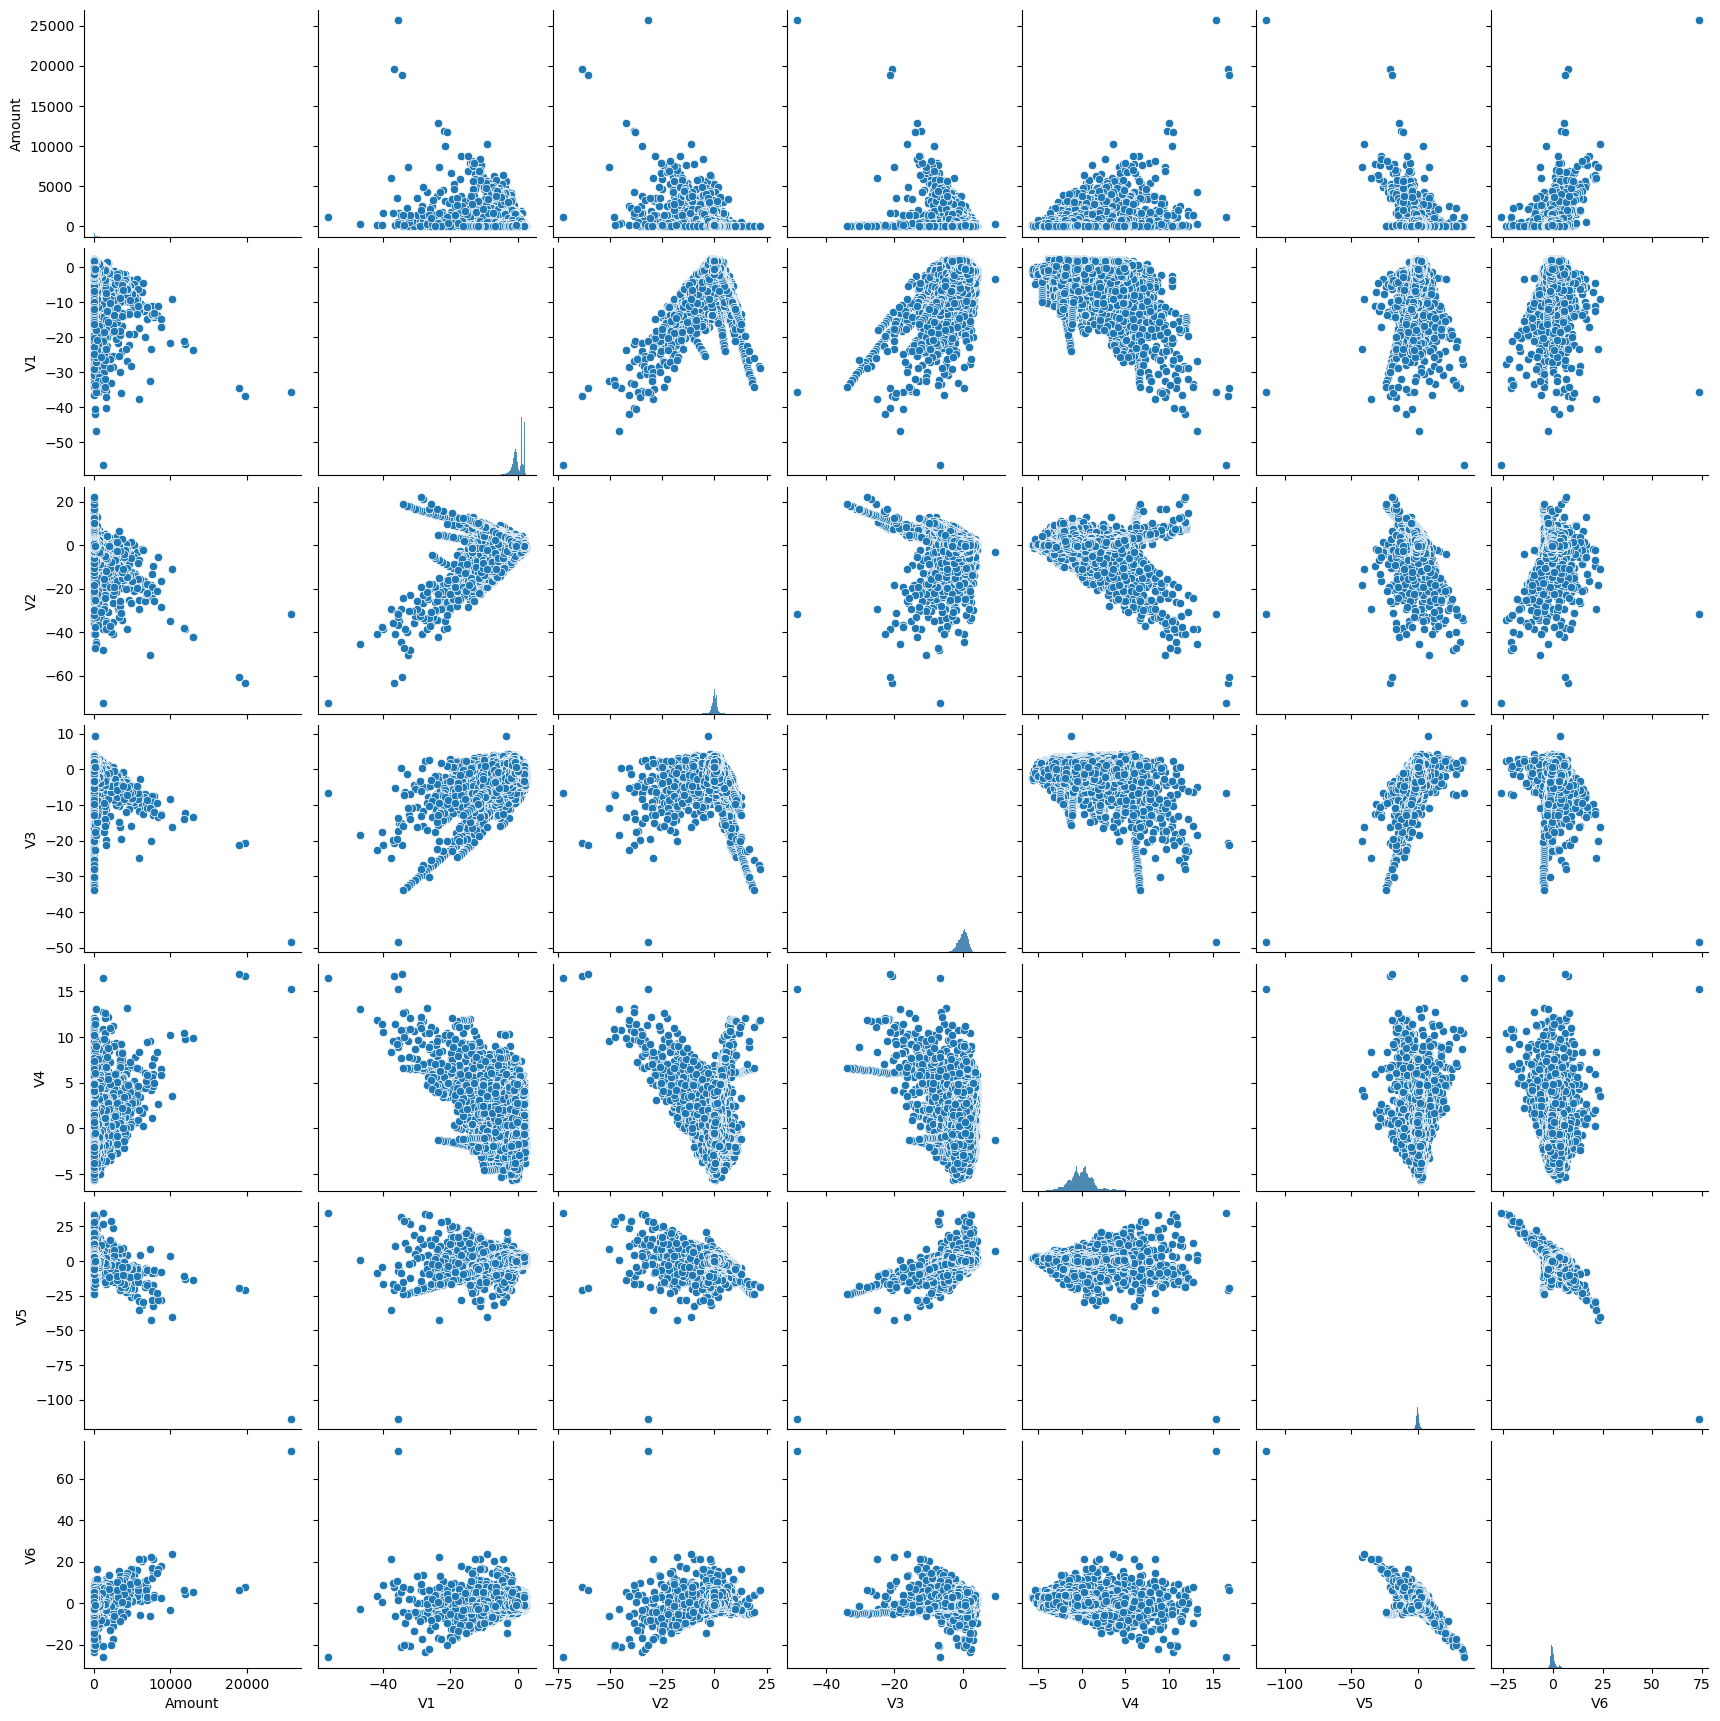

In [11]:
sns.pairplot(df[['Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6']])


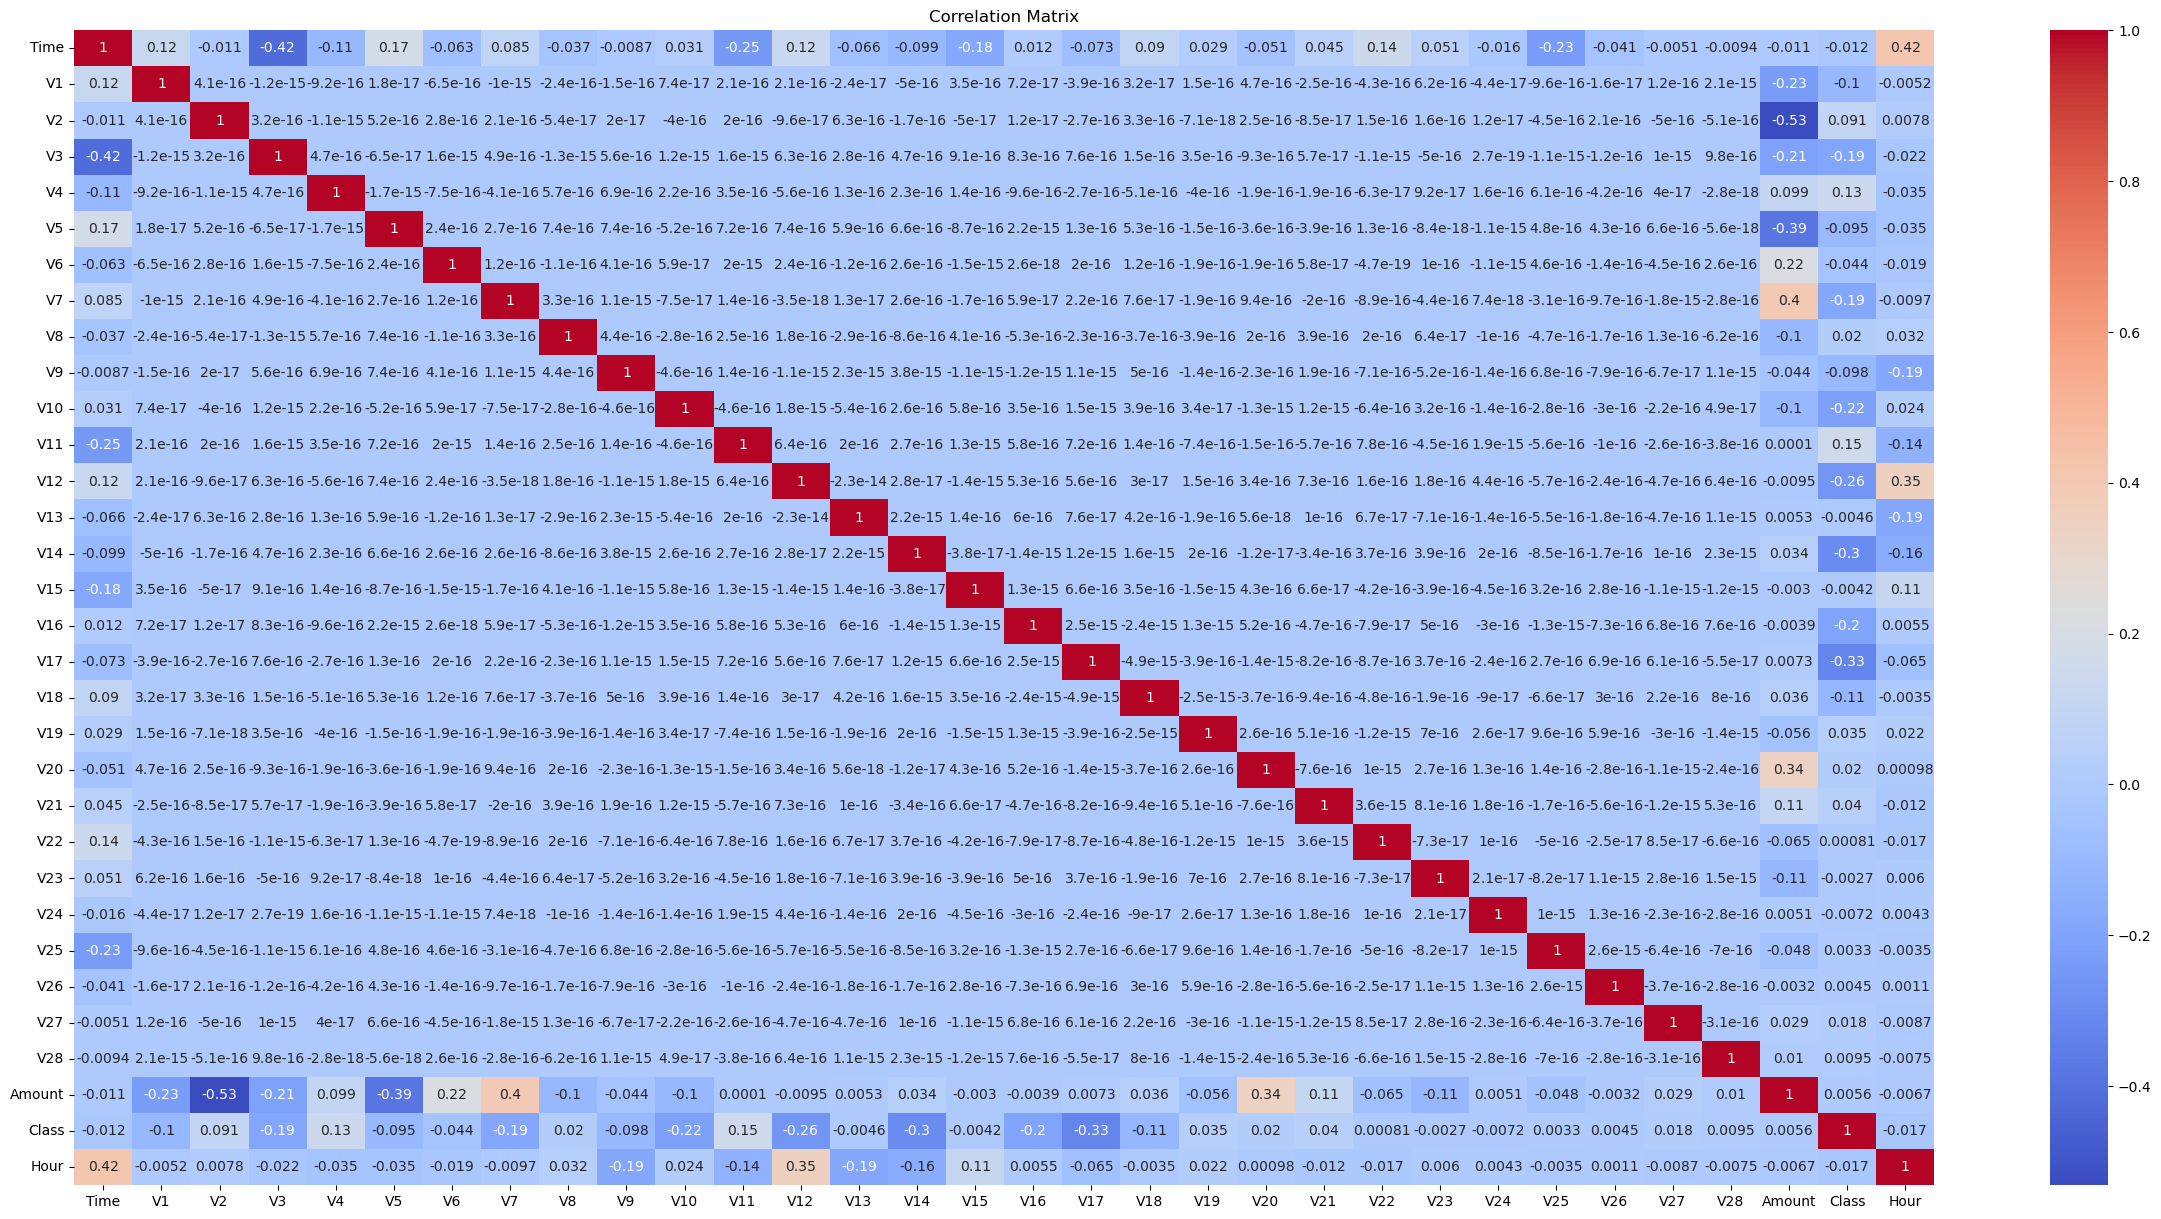

In [12]:
#Correlation map
df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

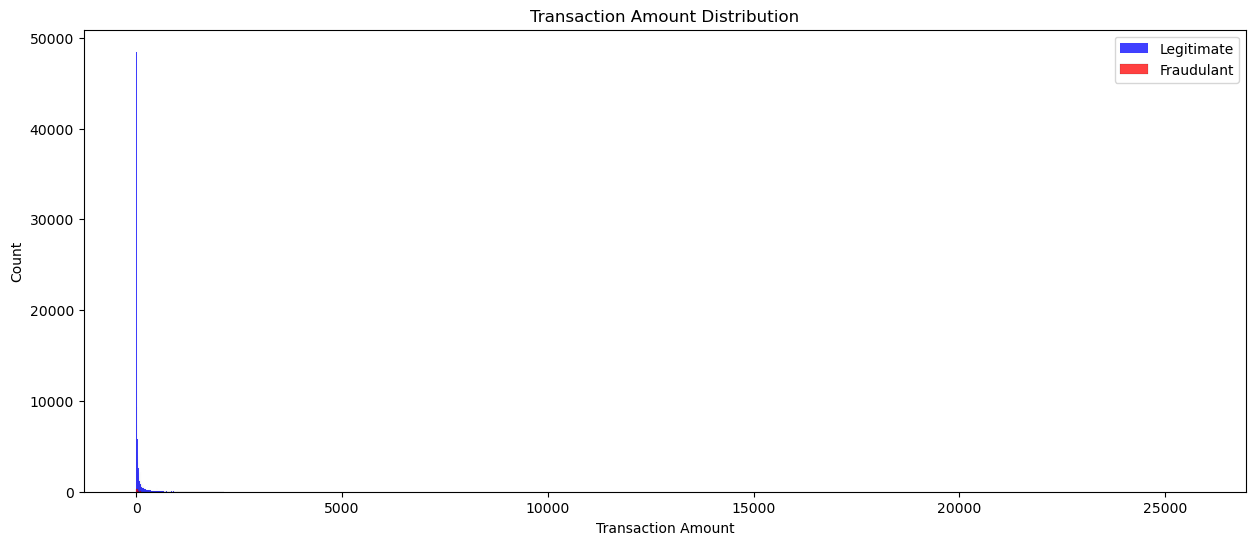

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(df[df['Class']==0]['Amount'],color='blue',label='Legitimate')
sns.histplot(df[df['Class']==1]['Amount'],color='red',label='Fraudulant')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title('Transaction Amount Distribution')
plt.legend()
plt.show()

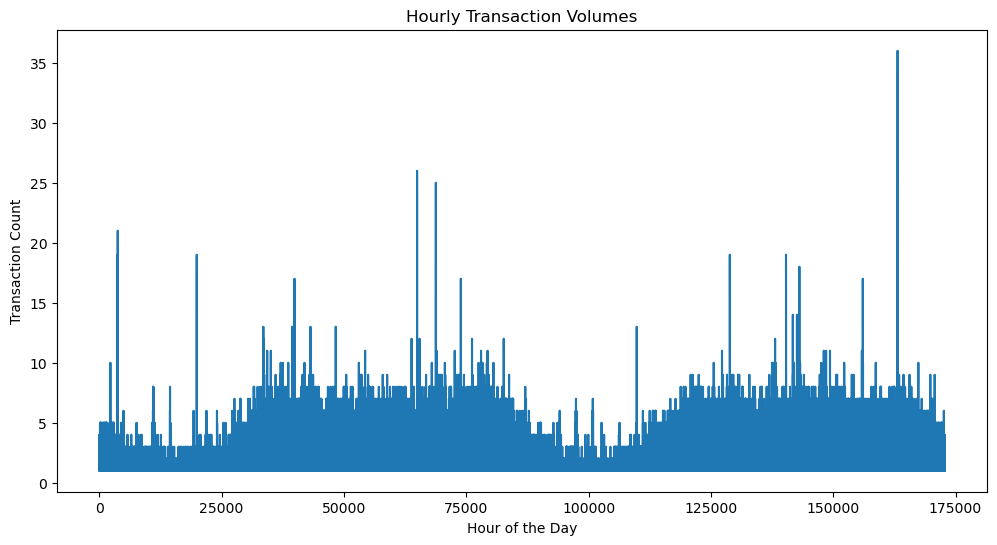

In [14]:
plt.figure(figsize=(12,6))
hourly_count=df.groupby('Time')['Class'].count()
plt.plot(hourly_count.index,hourly_count.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Hourly Transaction Volumes')
plt.show()

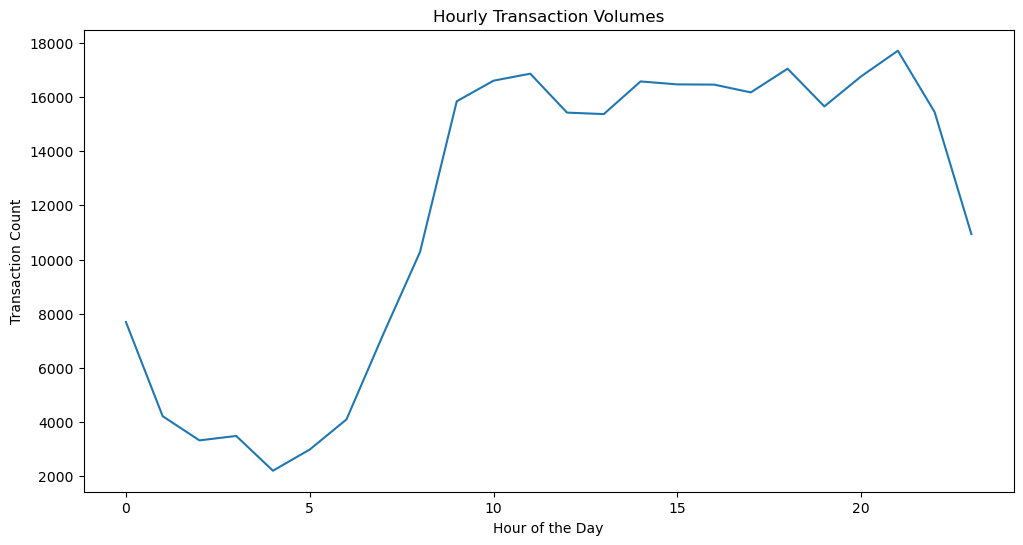

In [15]:
plt.figure(figsize=(12,6))
hourly_count=df.groupby('Hour')['Class'].count()
plt.plot(hourly_count.index,hourly_count.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.title('Hourly Transaction Volumes')
plt.show()

<a id="6"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PROCESSING</p>


In [16]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the 'Amount' column
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,0


In [17]:
#Train test split
x=df.drop('Class',axis=1)
y=df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
53728,46120.0,1.271490,0.095668,-0.069079,0.138052,0.400603,0.572674,-0.169764,0.184765,-0.078890,...,-0.271564,-0.792449,-0.010063,-1.355587,0.285980,0.192268,-0.019997,-0.009171,-0.349671,12
197542,132067.0,0.005243,0.773472,0.117566,-0.803640,0.743441,-0.543607,0.896039,-0.039612,-0.301617,...,-0.233253,-0.531490,0.008465,-0.494161,-0.446032,0.149571,0.241980,0.083785,-0.331280,12
270039,163893.0,2.074354,-0.041648,-1.122694,0.379831,-0.059119,-1.126606,0.189723,-0.333093,0.531137,...,-0.297890,-0.714691,0.321056,-0.106688,-0.273797,0.204714,-0.069885,-0.061281,-0.349271,21
33487,37253.0,-0.275199,-0.000424,0.903541,-1.171617,-0.284731,0.065192,0.093310,0.240966,-1.267339,...,0.071612,0.025681,-0.002454,-0.417222,-0.029053,-0.306365,0.030116,0.028290,-0.078801,10
129651,79172.0,-0.641161,0.976356,0.935321,-0.511973,0.565671,0.503326,0.369896,0.396146,-0.146786,...,-0.274544,-0.735050,-0.124363,-1.215645,-0.144604,0.165826,0.372642,0.152534,-0.349671,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94650,64970.0,0.827485,-0.807104,1.687944,1.724751,-1.304040,1.298686,-1.147888,0.635391,1.576253,...,0.055165,0.415095,-0.148316,0.038520,0.388996,-0.218658,0.098339,0.038918,0.046659,18
282981,171285.0,1.624549,-1.512884,-2.877503,-0.322808,-0.073226,-1.216427,0.806199,-0.534104,-1.196941,...,0.097270,0.098735,-0.413402,-0.357653,0.357212,0.995456,-0.196131,-0.053949,0.954944,23
48228,43551.0,-1.023067,-1.133015,2.153786,0.014974,-1.766689,0.757011,0.186095,0.155988,-1.173826,...,0.614454,1.260679,0.489585,0.122904,0.238179,0.256869,0.032207,0.115035,0.966139,12
210091,137837.0,-0.310256,0.595066,0.472350,-0.522379,0.161027,-1.222722,0.783597,-0.053897,-0.055518,...,-0.183588,-0.450910,0.314676,0.500518,-0.610784,0.084767,0.124382,0.067636,-0.340156,14


In [19]:
y_train

53728     0
197542    0
270039    0
33487     0
129651    0
         ..
94650     0
282981    0
48228     0
210091    0
154156    0
Name: Class, Length: 227845, dtype: int64

In [20]:
print("Length of x_train is: {x_train}".format(x_train = len(x_train)))
print("Length of x_test is: {x_test}".format(x_test = len(x_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of x_train is: 227845
Length of x_test is: 56962
Length of y_train is: 227845
Length of y_test is: 56962


In [21]:
y_train = np.array(y_train).reshape(-1)
y_train

array([0, 0, 0, ..., 0, 0, 0])

<a id="7"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL BUILDING AND SCORE</p>

In [22]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred=lr.predict(x_test)

<a id="8"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL EVALUATION</p>

In [24]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56848
           1       0.66      0.72      0.69       114

    accuracy                           1.00     56962
   macro avg       0.83      0.86      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
#confusion matrix
confusion=confusion_matrix(y_test,y_pred)
print(confusion)

[[56805    43]
 [   32    82]]


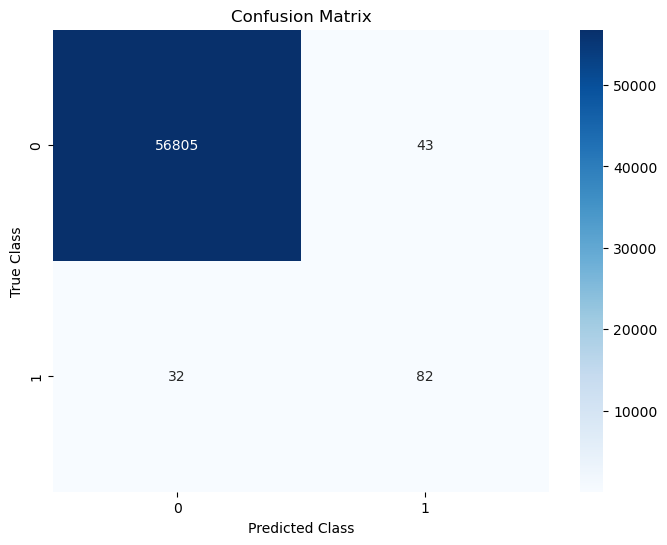

In [27]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [28]:
#ROC AUC Score
print('ROC AUC:',roc_auc_score(y_test,y_pred))

ROC AUC: 0.8592709212871752


<a id="9"></a>
# <p style="background-color:#f50202;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL OPTIMIZATION</p>

In [29]:
from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,10]}

#GridSearch CV
gridsearch_cv=GridSearchCV(lr,parameters,cv=5)
gridsearch_cv.fit(x_train,y_train)

#get best model
best_model=gridsearch_cv.best_estimator_

In [30]:
# Make predictions
y_pred = lr.predict(x_test)

# Calculate the accuracy
accuracy = lr.score(x_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9986833327481479
